# Exercice 4

*Les données utilisées dans cet exercice sont open source et ne sont pas en relation avec ma thèse parce que les données utilisées dans la thèse sont confidentielles.*

## Exploration du répertoire

D'abord, on fait un git pull pour récupérer les données qu'on a téléversé dans le répertoire GIT.<br>
**Attention!** Si tu as commencé à écrire dans le notebook, enregistre les données pour ne pas les perdre.<br>
Ensuite, on s'assure que nous avons les données dans le répertoire avec la commande "ls".


In [1]:
ls

bar-chart.html     exercice_en.Rmd    exercice.ipynb          exercice_R_en.org
data.csv           exercice_fr.ipynb  exercice_python_en.org  exercice_R_fr.org
exercice_en.ipynb  exercice_fr.Rmd    exercice_python_fr.org


## Exploration du jeu de données
Maintenant qu'on a les données, on va commencer à les explorer.<br>
**NB:** les données suivantes sont déjà formattées en .csv.


In [2]:
# Reading Data
import pandas as pd
import numpy as np
df = pd.read_csv("./data.csv", sep="	") 

In [3]:
# cChecking Data
print(len(df))
df.head()

7569


date            edited_by         job        researched_by  \
0  2013-08-29  Angie Drobnic Holan  Republican        Jon Greenberg   
1  2013-08-29  Angie Drobnic Holan  Republican       Louis Jacobson   
2  2013-08-29        Greg Borowski         NaN        Tom Kertscher   
3  2013-08-28     Aaron Sharockman         NaN        Rochelle Koff   
4  2013-08-28     Aaron Sharockman         NaN  Angie Drobnic Holan   

                                        source      state  \
0                                 Scott Walker  Wisconsin   
1                                Mike Huckabee   Arkansas   
2                League of Conservation Voters        NaN   
3  National Republican Congressional Committee        NaN   
4                             Janet Napolitano        NaN   

                                           statement  \
0  In the Wisconsin health insurance exchange, "t...   
1  "America’s gun-related homicide rate … would b...   
2  Says U.S. Sen. Ron Johnson voted to let oil an...   
3  "Congressman Patrick Murphy voted to keep the ...   
4  The 2010 DREAM Act failed despite "strong bipa...   

                                            subjects  truth  
0                                    ['Health Care']      3  
1                       ['Crime', 'Guns', 'Pundits']      0  
2  ['Climate Change', 'Energy', 'Environment', 'T...      5  
3                                    ['Health Care']      2  
4                  ['Bipartisanship', 'Immigration']      2

In [4]:
df['year'] = df.date.apply(lambda x: int(x[:4]))

In [7]:
# Checking Missing Data
df.isnull().sum()

date                0
edited_by         151
job              1477
researched_by      31
source              0
state            1477
statement           0
subjects            0
truth               0
year                0
dtype: int64

In [8]:
# Dropping all missing data
df_ = df.dropna(subset=['job'])
print(len(df_))
df_.isnull().sum()

6092


date               0
edited_by        138
job                0
researched_by     28
source             0
state              0
statement          0
subjects           0
truth              0
year               0
dtype: int64

## Statistiques de base

In [9]:
print("There are ",len(set(df_.job)), " unique jobs.")
print("There are ",len(set(df_.edited_by)), " unique editors.")
print("There are ",len(set(df_.state)), " unique states.")

There are  19  unique jobs.
There are  115  unique editors.
There are  59  unique states.


In [10]:
# Number of jobs per state per year
pivot_table = pd.pivot_table(df_, index=['state'], columns=['year'], values=['job'], aggfunc='count', fill_value=0)
pivot_table

job                              
year                 2007 2008 2009 2010 2011 2012 2013
state                                                  
Alabama                 0    0    1    7    0    2    3
Alaska                  2   21   13   11    7    2    2
Arizona                12  141    7   30    2    0    3
Arkansas               11   22    0    7    3   11    3
California              4    1   11   32   20    3   16
Colorado                5    0    1    3    1    2    1
Connecticut             5    6    3    1    1    3    1
Delaware               11   18    3   13    7   16    1
District of Columbia    0    0    1    0    5    5    1
Florida                 0    1   21  289  186  148  100
Georgia                 0    2    5   49  130   97   72
Hawaii                  0    0    0    0    0    0    1
Idaho                   0    0    0    0    1    0    0
Illinois               14  153   62   66   67  127   44
Indiana                 0    0    8    5    4    3    2
Iowa                    0    0    5    1    1    0    2
Kansas                  3    0    1    1    2    1    1
Kentucky                0    0    6   11    4    0   14
Louisiana               0    0    4    8    3    0    0
Maine                   0    0    0    0    0    0    1
Maryland                0    0   12   15   12    4    4
Massachusetts          28   11    2    7   48  122    0
Michigan                0    0    0    3    4    5    3
Minnesota               0    0    7    8   41    2    6
Mississippi             0    0    1    0    1    0    0
Missouri                0    0    4    0    1    0    0
Montana                 0    1    0    0    0    0    0
Nebraska                0    0    1    0    1    0    0
Nevada                  0    0    0   15    5    1    2
New Hampshire           0    0    0    3    5   32    7
New Jersey              0    3    3    0   79  146   42
New Mexico             11    1    0    2    5    3    1
New York               52   64    9   19   30    6    8
North Carolina         11    2    0    4    2    0    1
North Dakota            0    0    0    1    2    0    0
Ohio                    6    1   14  110  181  135   73
Oklahoma                0    0    4    3    2    0    5
Oregon                  0    0    2   54   73   88   27
Pennsylvania            0    0    2    5   16   36    0
Rhode Island            0    0    1   64   89   93   59
Rhode island            0    0    0    0    0    1    0
South Carolina          0    1    7    5    5    4    2
South Dakota            0    0    0    0    0    1    0
Tennesse                0    0    0    1    0    0    0
Tennessee              11    4    1    1    0   62    3
Texas                   7    2    9  268  209  157  110
United Kingdom          0    0    1    0    0    0    0
Utah                    0    0    3    2   15    3    2
Vermont                 0    1    5    5    3    1    2
Virgina                 0    0    0    1    1    1    0
Virginia                0    1    6   40  113   70   46
Washington              0    0    0    4    0    1    1
Washington state        0    0    0    2    0    0    2
Washington, D.C.        0    6    9   22   14   20   10
West Virginia           0    0    2    3    0    0    1
Wisconsin               0    0    0   85  179  139   67
Wyoming                 0    0    2    1    1    0    0
ohio                    0    0    0    2    1    0    0
the United States       0    0    0    0    0    1    0

## Représentations graphiques 
We will start by plotting the Nbr of jobs per year of New York versus Texas.

In [11]:
# Installing Plotly
import sys
!{sys.executable} -m pip install plotly

In [12]:
import plotly
import plotly.graph_objs as go
# Create two additional DataFrames to traces
df1 = df_[df_.state == "New York"]
df2 = df_[df_.state == "Texas"]
# Create two traces, first "New York" and second "Texas"
trace1 = go.Bar(x=df1["year"], y=df1["job"], name="New York")
trace2 = go.Bar(x=df2["year"], y=df2["job"], name="Texas")
# Fill out  data with our traces
data = [trace1, trace2]
# Create layout and specify title, legend and so on
layout = go.Layout(title="Nbr of jobs per state per year",
                   xaxis=dict(title="Year"),
                   yaxis=dict(title="Count of Jobs"),
                   barmode="group")
# Create figure with all prepared data for plot
fig = go.Figure(data=data, layout=layout)
fig

In [13]:
# Checkig the top 7 jobs present in the United states
df_.job.value_counts()[:7]

Republican      3097
Democrat        2347
None             388
Organization      59
Independent       50
Newsmaker         40
Libertarian       22
Name: job, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

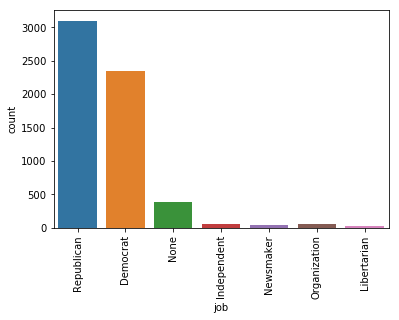

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(df_[df_.job.isin(df_.job.value_counts()[:7].keys())].job)
plt.xticks(rotation=90)

#### Réflexion
It seems that this database is more about politics since we see that the top 2 jobs are *Republicans* and *Democrats*. <br>
Let us check the rate of Republicans versus Democrats in the top states of the US.<br>
But First let us identify the top states of the US.

In [15]:
# Checkig the top 7 US states present in the dataset
df_.state.value_counts()[:7]

Texas           762
Florida         745
Illinois        533
Ohio            520
Wisconsin       470
Georgia         355
Rhode Island    306
Name: state, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

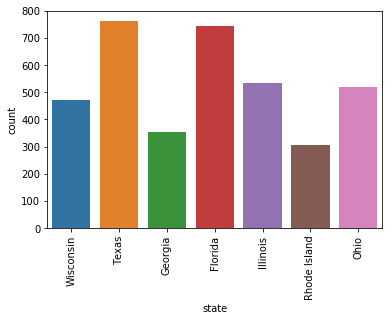

In [18]:
sns.countplot(df_[df_.state.isin(df_.state.value_counts()[:7].keys())].state)
plt.xticks(rotation=90)

Now let us compare the distribution of the Republican versus Democrat in the top 7 US states

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

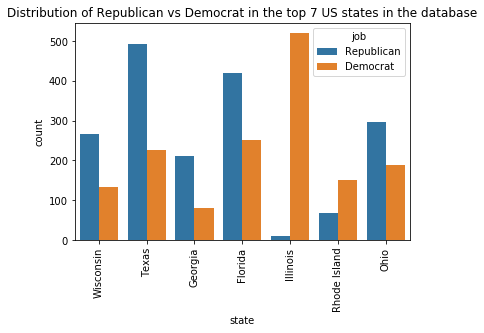

In [31]:
df1 = df_[(df_.job.isin(["Republican","Democrat"])) & df_.state.isin(df_.state.value_counts()[:7].keys())]

sns.countplot(data=df1, x='state', hue='job' )
plt.title("Distribution of Republican vs Democrat in the top 7 US states in the database")
plt.xticks(rotation=90)

## Word Cloud
We could have also found the top states ad top jobs using word cloud.

In [32]:
# Installing WordCloud
import sys
!{sys.executable} -m pip install wordcloud

     |████████████████████████████████| 365 kB 12.0 MB/s eta 0:00:01


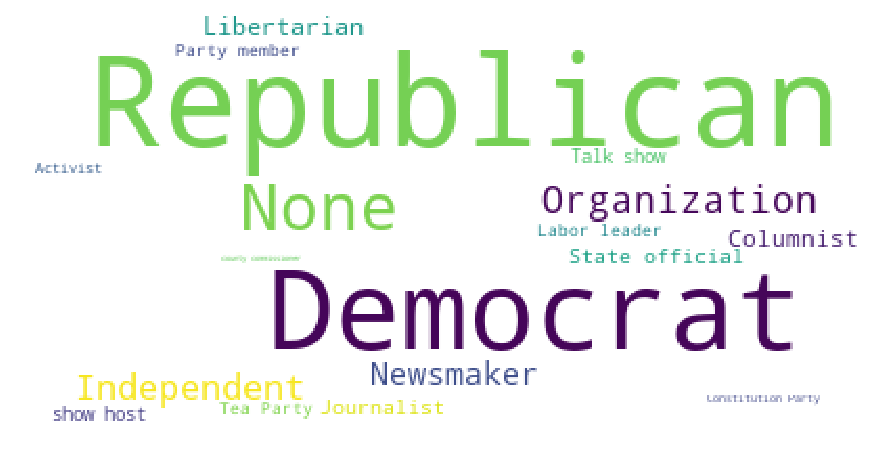

In [47]:
from wordcloud import WordCloud, ImageColorGenerator
text = ' '.join(df_.job.tolist())
wordcloud = WordCloud(background_color="white").generate(text)
# Display the generated image:
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

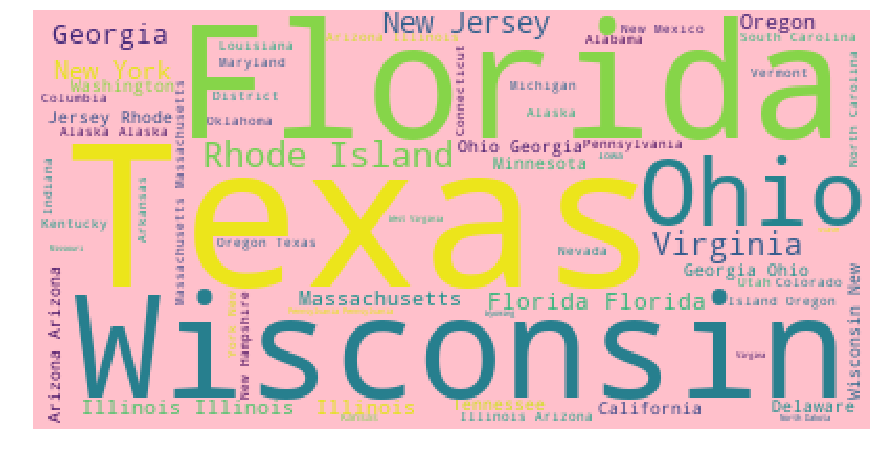

In [50]:
text = ' '.join(df_.state.tolist())
wordcloud = WordCloud(background_color="pink").generate(text)
# Display the generated image:
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()